In [6]:
# Importing dependencies as well as the Kiva dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Kiva dataset - Kaggle format:
kiva_loans = pd.read_csv('data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')
data = pd.DataFrame(kiva_loans)
data


id  funded_amount  loan_amount               activity  \
0        653051          300.0        300.0    Fruits & Vegetables   
1        653053          575.0        575.0               Rickshaw   
2        653068          150.0        150.0         Transportation   
3        653063          200.0        200.0             Embroidery   
4        653084          400.0        400.0             Milk Sales   
5       1080148          250.0        250.0               Services   
6        653067          200.0        200.0                  Dairy   
7        653078          400.0        400.0           Beauty Salon   
8        653082          475.0        475.0          Manufacturing   
9        653048          625.0        625.0  Food Production/Sales   
10       653060          200.0        200.0               Rickshaw   
11       653088          400.0        400.0              Wholesale   
12       653089          400.0        400.0          General Store   
13       653062          400.0        400.0         Clothing Sales   
14       653075          225.0        225.0                Poultry   
15       653054          300.0        300.0               Rickshaw   
16       653091          400.0        400.0          General Store   
17       653052          875.0        875.0              Tailoring   
18       653066          250.0        250.0                 Sewing   
19       653080          475.0        475.0           Beauty Salon   
20       653065          250.0        250.0                 Bakery   
21       653055          350.0        350.0             Restaurant   
22       653050          575.0        575.0         Clothing Sales   
23       653079          350.0        350.0             Embroidery   
24       653061          250.0        250.0             Food Stall   
25       653074          250.0        250.0                Farming   
26       653069          250.0        250.0  Construction Supplies   
27       653056          475.0        475.0               Rickshaw   
28       653071          125.0        125.0                Farming   
29       653073          250.0        250.0                Farming   
...         ...            ...          ...                    ...   
671175  1340274           75.0        125.0              Livestock   
671176  1340259            0.0         50.0              Livestock   
671177  1340279           25.0         25.0              Livestock   
671178  1340280            0.0         25.0              Livestock   
671179  1340282            0.0         25.0              Livestock   
671180  1340286            0.0        725.0              Livestock   
671181  1340285            0.0         25.0              Livestock   
671182  1340292            0.0        125.0              Livestock   
671183  1340290            0.0         75.0              Livestock   
671184  1340287            0.0        875.0              Livestock   
671185  1340298            0.0         25.0              Livestock   
671186  1340300           25.0         25.0              Livestock   
671187  1340297            0.0         25.0              Livestock   
671188  1340302            0.0        250.0              Livestock   
671189  1340315            0.0         25.0              Livestock   
671190  1340321            0.0         25.0              Livestock   
671191  1340327            0.0        725.0              Livestock   
671192  1340328            0.0        875.0              Livestock   
671193  1340333            0.0        125.0              Livestock   
671194  1340332            0.0         25.0              Livestock   
671195  1340329            0.0         50.0              Livestock   
671196  1340325            0.0        250.0              Livestock   
671197  1340330            0.0         25.0              Livestock   
671198  1340331            0.0         75.0              Livestock   
671199  1340318            0.0         25.0              Livestock   
671200  1340323        

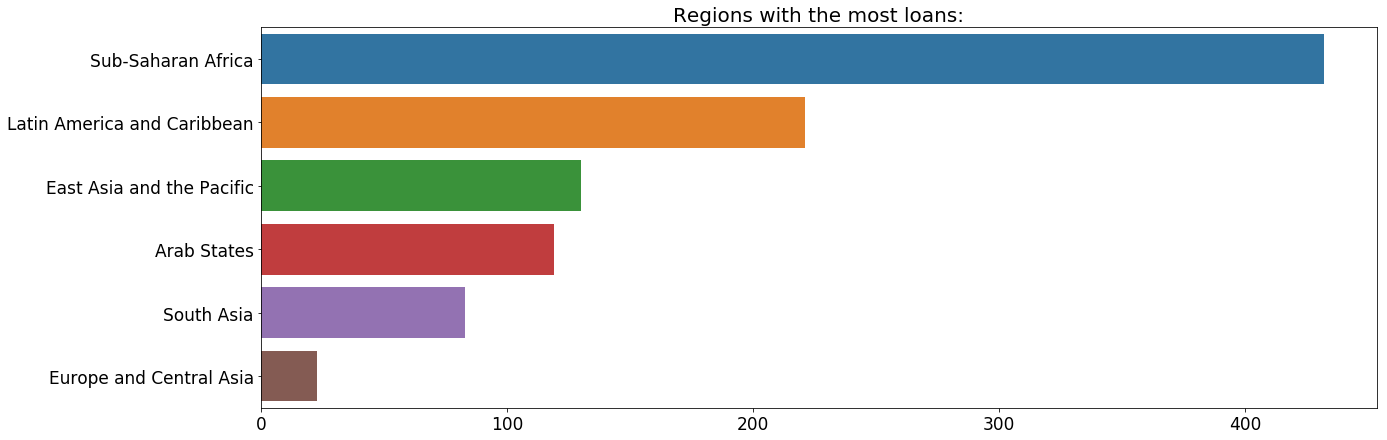

In [17]:
# Regions with the most loans
kiva_loan_regions = pd.DataFrame(kiva_mpi_region_locations['world_region'].value_counts())
kiva_loan_regions.reset_index(inplace=True)
kiva_loan_regions.columns = ['world_region', 'loan_amount']

kiva_loan_regions=pd.DataFrame(kiva_loan_regions)
kiva_loan_regions
plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loan_regions['loan_amount'], y=kiva_loan_regions['world_region'])
barplot.set(xlabel='', ylabel='')
plt.title('Regions with the most loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

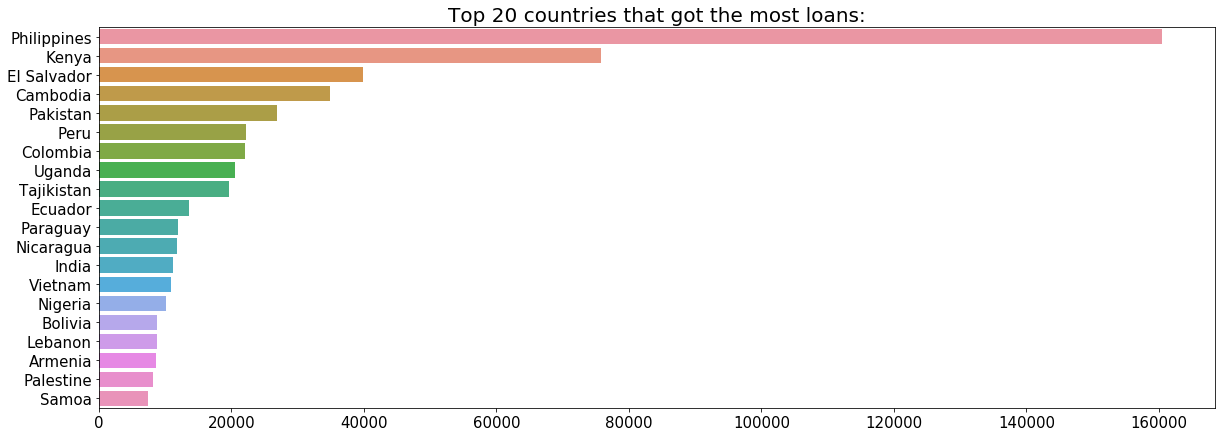

In [2]:
# Countries with  most loans
kiva_loans_countries = pd.DataFrame(kiva_loans['country'].value_counts(sort=['loan_amount']))
kiva_loans_countries.reset_index(inplace=True)
kiva_loans_countries.columns = ['country', 'loan_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loans_countries['loan_amount'][:20], y=kiva_loans_countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 countries that got the most loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

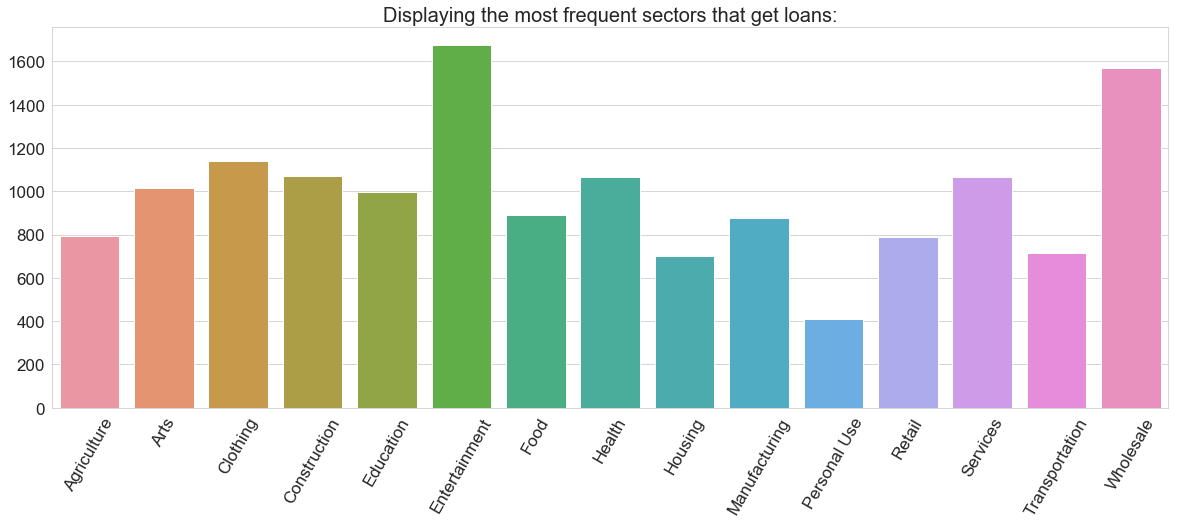

In [7]:
# most frequent sectors that get loans
kiva_loans_sectors = pd.DataFrame(kiva_loans.groupby(['sector'])['loan_amount'].mean())
kiva_loans_sectors.reset_index(inplace=True)
kiva_loans_sectors.columns = ['sector', 'average_frequent_sectors']

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.barplot(x='sector', y='average_frequent_sectors', data=kiva_loans_sectors)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying the most frequent sectors that get loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

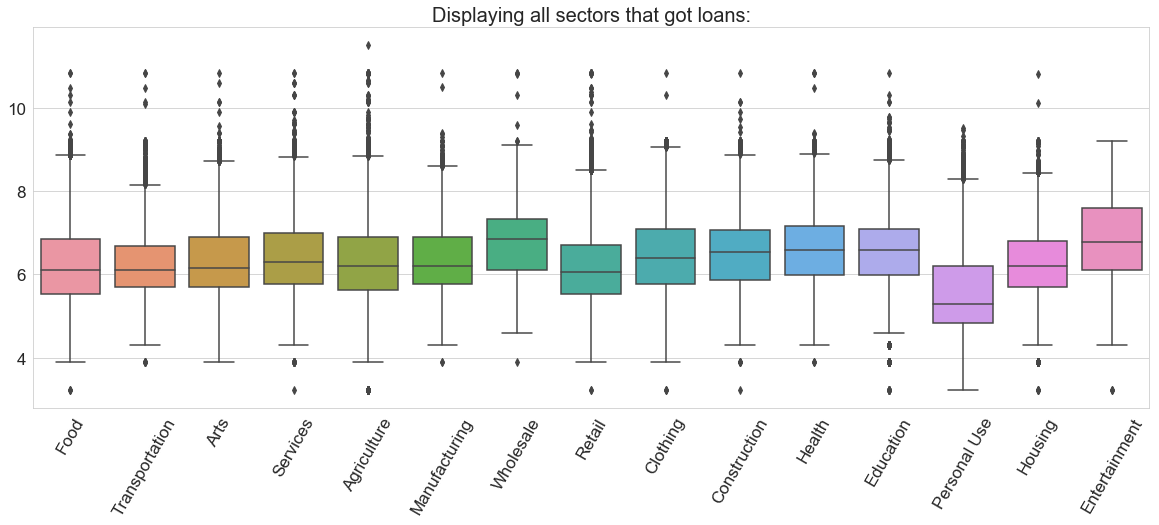

In [10]:
#all sectors that got loans
kiva_loans['loan_amount_log'] = np.log(kiva_loans['loan_amount'])

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

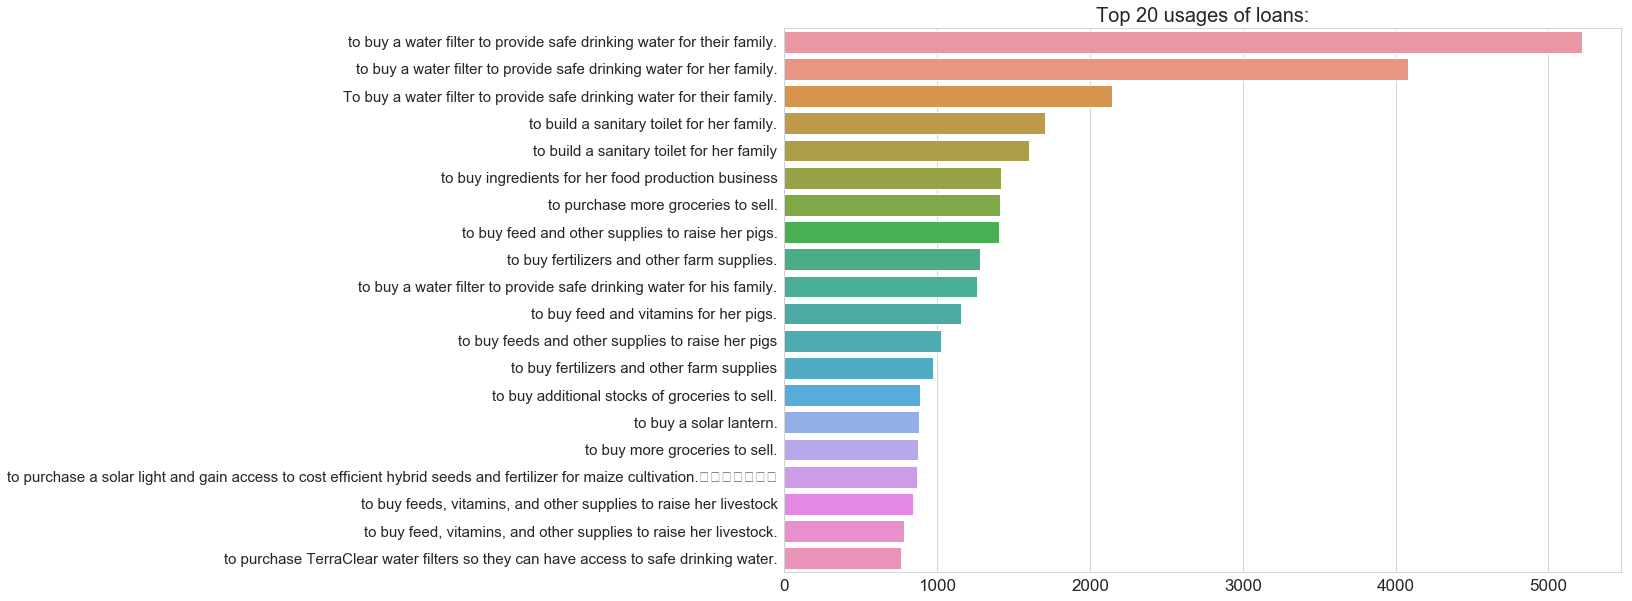

In [11]:
# most common usage of loans
kiva_use = pd.DataFrame(kiva_loans['use'].value_counts(sort='loan_amount'))
kiva_use.reset_index(inplace=True)
kiva_use.columns = ['use', 'total_amount']

plt.figure(figsize=(15, 10))

barplot = sns.barplot(x=kiva_use['total_amount'][:20], y=kiva_use['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 usages of loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show()